In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=[]

env: CUDA_VISIBLE_DEVICES=[]


### butcherbird vocalizations
Source:
- https://figshare.com/collections/Data_from_Temporal_regularity_increases_with_repertoire_complexity_in_the_Australian_pied_butcherbird_s_song/3495573

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from avgn.utils.paths import DATA_DIR

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
DSLOC = DATA_DIR /"raw/butcherbird/"

In [5]:
matfiles =list(DSLOC.glob('*.mat'))
len(matfiles), matfiles[0]

(17,
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/butcherbird/Audio_Bird14.mat'))

In [6]:
import h5py as h5

'Audio_Bird14'

In [34]:
mf = matfiles[5]
with h5.File(mf, 'r') as f:
    data = f[mf.stem].value

In [35]:
rate = 44100

In [36]:
np.shape(data)

(2, 45050796)

In [37]:
len(data[1,:])/rate

1021.56

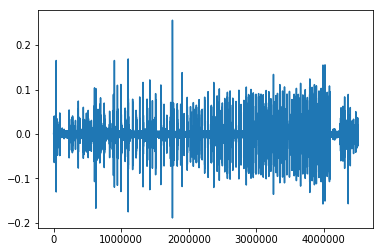

In [44]:
plt.plot(data[0,::10])

In [39]:
### parameters
n_fft=1024
hop_length_ms=3
win_length_ms=10
ref_level_db=20
pre=0.97
min_level_db=-70
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [500, 3000]

In [40]:
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

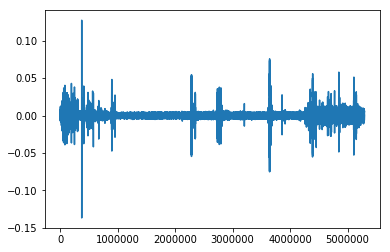

In [49]:
voc = data[0,:rate*120]
# filter data
voc = butter_bandpass_filter(voc, spectral_range[0], spectral_range[1], rate, order = 2)
plt.plot(voc)

In [50]:
spec = spectrogram(
    voc,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

(513, 40091)

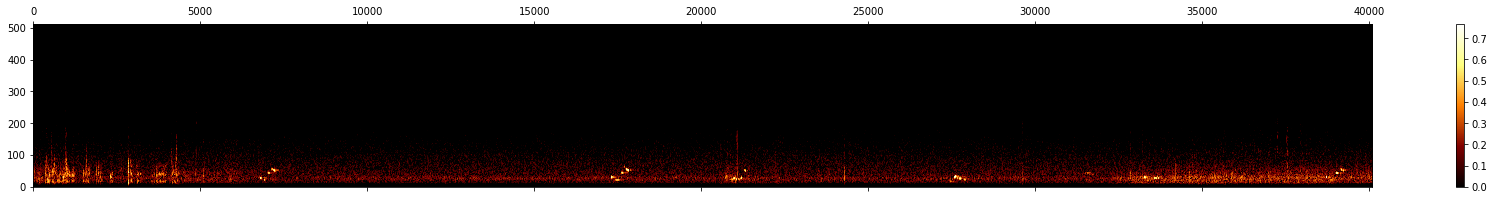

In [51]:
fig, ax = plt.subplots(figsize=(30,3))
plot_spec(spec, fig, ax);